# Arrays

Dealing with  multidimensional array is a key functionality in scientific computing. 
The `numpy` module is the core library for this. It provides a rich set of tools to create and manipulate
arrays including tools signal processing and linear algebra. 
`numpy` works seamlessly with the `scipy` module providing further numerical capabilities 
and with `matplotlib` as introduced before. 

In this section we give an introduction into `numpy` and also in some more `matplotlib` capabilities. To demonstrate 
the capabilities in more details we will discuss the use of `numpy` for kriging and 
later for seismic data processing. 

## References:
- [numpy tutorial](https://numpy.org/devdocs/reference/index.html)
- [scipy](https://docs.scipy.org/doc/scipy/reference/)

We can initialize `numpy` arrays from python lists:

# Creating arrays

In [1]:
import numpy as np
a = np.array([-1., -2., -3.]) 

The type of `a` is `numpy.ndarray`

In [2]:
type(a)

numpy.ndarray

numpy arrays have a shape:

In [3]:
a.shape

(3,)

We can print entries (also called elements) of the array analogously to lists:

In [4]:
a[0], a[1], a[2]

(-1.0, -2.0, -3.0)

Arrays can have a higher rank:

In [5]:
b = np.array([[1,2,3],[4,5,6]]) 
b

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
b.shape

(2, 3)

So `b` be read having has two rows and three columns. 
Elements are accessed by a double index:

In [7]:
b[0, 0], b[0, 1], b[1, 0]

(1, 2, 4)

or as index of index:

In [8]:
b[0][0], b[0][1], b[1][0]

(1, 2, 4)

`Numpy` also provides several functions to create arrays for instance:

An array of zeros:

In [9]:
np.zeros((2,2)) 

array([[ 0.,  0.],
       [ 0.,  0.]])

An array of ones:

In [10]:
np.ones((3,2)) 

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

Constant array, here with all entries equal to 7:

In [11]:
np.full((3,2), 7)

array([[7, 7],
       [7, 7],
       [7, 7]])

In [12]:
np.ones((3,2))*7

array([[ 7.,  7.],
       [ 7.,  7.],
       [ 7.,  7.]])

Create a 3x3 identity matrix:

In [13]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

A 2x2 random matrix:

In [14]:
np.random.random((2,2))

array([[ 0.45212811,  0.08465848],
       [ 0.7988099 ,  0.94090262]])

# Indexing and slicing

Arrays support slicing:

In [15]:
c = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
c

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

Get the second row of `c`:

In [16]:
c[1, :]

array([5, 6, 7, 8])

You can also use this:

In [17]:
c[1:2, :]

array([[5, 6, 7, 8]])

But notice that the shapes are different as the second version formally requests a range of rows: 

In [18]:
c[1, :].shape, c[1:2, :].shape

((4,), (1, 4))

The same for columns:

In [19]:
c[:, 1]

array([ 2,  6, 10])

In [20]:
c[:, 1:3]

array([[ 2,  3],
       [ 6,  7],
       [10, 11]])

Rows and columns can be gathered using a list (or narray) as index. Here we gather the columns 1, 3 and 2 from `c`: 

In [21]:
c[:, [1,3,2]]

array([[ 2,  4,  3],
       [ 6,  8,  7],
       [10, 12, 11]])

Slicing as well as indexing can be used to modify specific entries in an array. 
For instance multiplying the second row of `c` by -1:

In [22]:
c[1, :]*=-1
c

array([[ 1,  2,  3,  4],
       [-5, -6, -7, -8],
       [ 9, 10, 11, 12]])

or setting the columns 1 and 3 to 101:

In [23]:
c[:, [1,3]]=101
c

array([[  1, 101,   3, 101],
       [ -5, 101,  -7, 101],
       [  9, 101,  11, 101]])

Boolean array indexing allows picking arbitrary elements of an array based on a mask for instance to 
get the elements out of an array that satisfy some conditions: 

In [24]:
d = np.array([[1,2], [3, 4], [5, 6]])
d

array([[1, 2],
       [3, 4],
       [5, 6]])

Here we create a mask of those values in `c` that have a value larger than 3:

In [25]:
mask = d > 3
mask

array([[False, False],
       [False,  True],
       [ True,  True]], dtype=bool)

This mask can be used to gather all entries where the mask is True:

In [26]:
d[mask]

array([4, 5, 6])

This can be done in one line without the extra `mask`:

In [27]:
d[d>3]

array([4, 5, 6])

Masks can also be used to assign new values to entries that meet a condition. For instance to set 
all values less or equal to three to zero:

In [28]:
d[d<=3]=0
d

array([[0, 0],
       [0, 4],
       [5, 6]])

Transposing an array is done by using the T attribute of an array object:

In [29]:
d.T

array([[0, 0, 5],
       [0, 4, 6]])

In [30]:
d.shape, d.T.shape

((3, 2), (2, 3))

# Array Datatypes

Every numpy array has elements of the same type. Numpy makes assumption or tries to guess a data type when you create an array. In general all functions creating arrays have an optional parameter to explicitly specify the data type the user wants. More on types can be found [here](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)

Here all entries in the list of the np.array are integers so the resulting array is integer:

In [31]:
x=np.array([1, 2]) 
x.dtype

dtype('int64')

but it is sufficient to change one of the list entries to a float type to make the created array of type float:

In [32]:
x=np.array([1, 2.]) 
x.dtype

dtype('float64')

but you can also enforce the result to be of a specific type regardless of the list entries:

In [33]:
x=np.array([1, 2], dtype=np.float) 
x.dtype

dtype('float64')

# Array Mathematics

As basic mathematical functions operate element-wise on arrays there is no need to loop over the entries. This is computationally more efficient and allows for clearer code.

Here some examples:

In [34]:
x = np.array([[1,2],[3,4]], dtype=np.float)
y = np.array([[5,6],[7,8]], dtype=np.float)

Element wise sum:

In [35]:
x + y

array([[  6.,   8.],
       [ 10.,  12.]])

Element wise difference:

In [36]:
x - y

array([[-4., -4.],
       [-4., -4.]])

Flip sign:

In [37]:
-x

array([[-1., -2.],
       [-3., -4.]])

Element wise product:

In [38]:
x*y

array([[  5.,  12.],
       [ 21.,  32.]])

Element wise division:

In [39]:
x / y

array([[ 0.2       ,  0.33333333],
       [ 0.42857143,  0.5       ]])

Element wise square root (and other unitary operations):

In [40]:
np.sqrt(x)

array([[ 1.        ,  1.41421356],
       [ 1.73205081,  2.        ]])

# Matrix multiplication

The dot function is used to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. Here some examples: 

In [41]:
X = np.array([[1,2],[3,4]])
Y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

Dot product of two vectors returning a floating point number:

In [42]:
np.dot(v,w)

219

Matrix vector product of matrix `X` and vector `v`: 

In [43]:
np.dot(X,v)

array([29, 67])

This is the same like applying the inner product between the rows 0 and 1 of `X` with vector `v`

In [44]:
np.array([np.dot(X[0,:],v), np.dot(X[1,:],v)])

array([29, 67])

There is also a matrix-matrix product:

In [45]:
np.dot(X,Y)

array([[19, 22],
       [43, 50]])

In [46]:
np.dot(x,y[:,0])

array([ 19.,  43.])

# Files

## Text CSV files

`numpy` is providing a variety of functions to directly load data files into arrays. 
The `loadtxt` function is commonly used to load CSV files. Where we are loading the
CSV file [gravity_tasmania.csv](./gravity_tasmania.csv) into the 
array `gdata`. The data set is a the measurement of vertical gravity anomalies at various stations
across Tasmania. It has three columns namely the easting and northing of the station 
and the measured and corrected gravity in mGal. The columns are separated by commas 
and contains commend marked by `#`:

In [47]:
gdata=np.loadtxt("./gravity_tasmania.csv", delimiter=',', comments="#")
print("number of records =",gdata.shape)

number of records = (151, 3)


We can obtain the `x`,`y` coordinates and the corresponding measurements `grav`: 

In [48]:
x=gdata[:,0]
y=gdata[:,1]
grav=gdata[:,2]

We plot the position of the stations as a scatter plot:

In [49]:
#%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x, y, s=4)
plt.xlabel('easting[m]')
plt.ylabel('northing[m]')
plt.grid(True)
plt.title("gravity station position")

Text(0.5,1,'gravity station position')

We would like to plot the gravity distribution as recorder at the stations. For this
we interpolate the data from the point observations to a regular grid. First 
we create the grid lines `xi` and `yi` along the x and y axis using `linspace` which
return evenly spaced numbers over a specified interval:

In [50]:
xline=np.linspace(x.min(),x.max(),50)
yline=np.linspace(y.min(),y.max(),50)

Then these grid line positions are combined to actual grid node positions using `meshgrid`:

In [51]:
xi,yi = np.meshgrid(xline,yline)

In [52]:
xi.shape

(50, 50)

Now we use the `griddata` function of the `scipy` to interpolate the scattered data `grav` at `(x,y)` to the 
grid nodes `(xi, yi)`:

In [53]:
from scipy.interpolate import griddata
gravi = griddata((x,y),grav,(xi,yi),method='linear')

Now we can plot the interpolated data `gravi` using contours:

Text(0.5,1,'gravity across Tasmania')

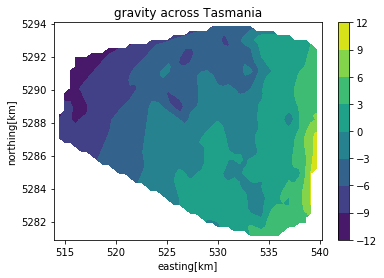

In [54]:
plt.figure()
plt.contourf(xi*1e-3, yi*1e-3, gravi)
plt.colorbar()
plt.xlabel('easting[km]')
plt.ylabel('northing[km]')
plt.title("gravity across Tasmania")

Now we want to write the interpolated data `gravi` but only those data that have been interpolated (not set to `nan`). So we first create an masked index to mark these entries:

In [55]:
idx_notnan=np.logical_not(np.isnan(gravi))

Then we put the entries in `xi`, `yi` and `gravi` that correspond to non-nan entries in `gravi` into a new array `interpolated_data`.  `axis=-1` makes the stacking to work column-wise. 

In [56]:
interpolated_data=np.stack((xi[idx_notnan],yi[idx_notnan],gravi[idx_notnan]), axis=-1)

And then we write them to a file ['test.out'](test.out):

In [57]:
np.savetxt('test.out', interpolated_data, delimiter=',')

## Binary files

numpy provides also a mechanism to read (and write) arrays as binary files. 
Here we reading the "marmousi.bin" file which gives a seismic velocity distribution as 32 bit floating point 
numbers. The data are read in and are then reshaped as a $384 \times 122$ matrix. Notice that these 
information are not obtained from the file itself:

In [58]:
velocity_data = np.fromfile("marmousi.bin", dtype="f4").reshape((384, 122))

We can now plot the `velocity_data` data using `plt.imshow` assuming an horizontal extent of $4600m$ and a depth of $1500m$

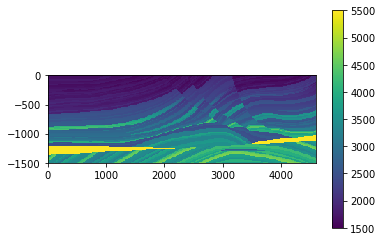

In [59]:
plt.figure()
plt.imshow(velocity_data.T, extent=(0, 4600., -1500,0))
plt.colorbar()

We can also plot the interpolated gravity data using 'imshow': 

Text(0.5,1,'gravity across Tasmania')

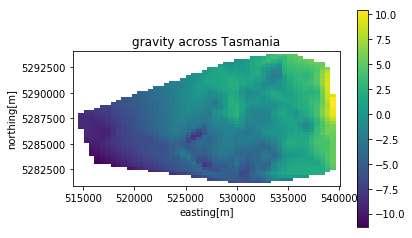

In [60]:
plt.figure()
plt.imshow(gravi, extent=(xi.min(),xi.max(),  yi.min(),yi.max()))
plt.colorbar()
plt.xlabel('easting[m]')
plt.ylabel('northing[m]')
plt.title("gravity across Tasmania")